In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [4]:
# 读入文件
train_data_df = pd.read_csv("../data/traindata.csv")
train_label_df = pd.read_csv("../data/trainlabel.txt")
features = train_data_df.columns

# 数值填充
train_data_df.replace('Preschool', 1, inplace=True)
train_data_df.replace('1st-4th', 2, inplace=True)
train_data_df.replace('5th-6th', 3, inplace=True)
train_data_df.replace('7th-8th', 4, inplace=True)
train_data_df.replace('9th', 5, inplace=True)
train_data_df.replace('10th', 6, inplace=True)
train_data_df.replace('11th', 7, inplace=True)
train_data_df.replace('12th', 8, inplace=True)
train_data_df.replace('HS-grad', 9, inplace=True)
train_data_df.replace('Some-college', 10, inplace=True)
train_data_df.replace('Assoc-voc', 11, inplace=True)
train_data_df.replace('Assoc-acdm', 12, inplace=True)
train_data_df.replace('Bachelors', 13, inplace=True)
train_data_df.replace('Prof-school', 14, inplace=True)
train_data_df.replace('Masters', 15, inplace=True)
train_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
encoded_features = pd.concat([pd.DataFrame(encoded_features), train_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
encoded_features

# 数据归一化
encoded_features.columns = encoded_features.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(encoded_features)

encoded_features = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = encoded_features.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age','fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in encoded_features.columns: encoded_features = encoded_features.drop(i, axis=1)
                
encoded_features

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.175098,3.782449,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,2.821506,-0.114762,1.131681,0.38330,-0.214689,-2.148673
1,-0.175098,-0.264379,-0.014813,-1.515578,5.270463,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.108878,2.706469,1.131681,-0.14506,-0.214689,0.775212
2,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,-2.932691,-0.045458,-0.022952,-0.697579,1.440206,-0.416186,-0.14506,3.690793,0.775212
3,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.182192,-0.050070,-0.416186,-0.14506,-0.214689,-0.036978
4,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-1.210779,1.111395,-0.029219,-0.14506,-0.214689,-1.255264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,0.695392,-1.042350,-1.190120,-0.14506,-0.214689,0.775212
22788,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,3.484849,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.917522,-0.674011,-0.416186,-0.14506,-0.214689,-0.036978
22789,-0.175098,-0.264379,-0.014813,0.659814,-0.189737,-0.286956,-0.206136,-0.018738,-0.396990,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.184379,1.060678,-0.416186,-0.14506,-0.214689,-0.036978
22790,-0.175098,-0.264379,-0.014813,-1.515578,-0.189737,-0.286956,-0.206136,-0.018738,2.518958,-0.027321,...,-0.025662,0.340984,-0.045458,-0.022952,-0.404322,1.382914,-0.029219,-0.14506,-0.214689,-0.036978


In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(encoded_features, train_label_df, test_size=0.2, random_state=6)

In [6]:
# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'objective': 'multi:softmax',  # 多分类问题
    'num_class': 2,  # 类别数
    'max_depth': 3,  # 树的最大深度
    'eta': 0.3,  # 学习率
    'eval_metric': 'merror'  # 评估指标
}

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(dtest)

# 将预测结果转换为整数类型
y_pred = y_pred.astype(int)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8725597718797982


In [7]:
# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'objective': 'binary:logistic',  # 多分类问题
    'max_depth': 3,  # 树的最大深度
    'eta': 0.3,  # 学习率
    'eval_metric': 'merror'  # 评估指标
}

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.8690502303136652


In [8]:
# 设置参数范围
param_grid = {'max_depth': range(3, 10, 2),
             'min_child_weight': range(1, 10, 2)}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate = 0.1), param_grid=param_grid, cv=5, scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_train, y_train)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

                                     params  mean_test_score
0   {'max_depth': 3, 'min_child_weight': 1}         0.862502
1   {'max_depth': 3, 'min_child_weight': 3}         0.863270
2   {'max_depth': 3, 'min_child_weight': 5}         0.863324
3   {'max_depth': 3, 'min_child_weight': 7}         0.862282
4   {'max_depth': 3, 'min_child_weight': 9}         0.862228
5   {'max_depth': 5, 'min_child_weight': 1}         0.869851
6   {'max_depth': 5, 'min_child_weight': 3}         0.870070
7   {'max_depth': 5, 'min_child_weight': 5}         0.869851
8   {'max_depth': 5, 'min_child_weight': 7}         0.868535
9   {'max_depth': 5, 'min_child_weight': 9}         0.868864
10  {'max_depth': 7, 'min_child_weight': 1}         0.868096
11  {'max_depth': 7, 'min_child_weight': 3}         0.868699
12  {'max_depth': 7, 'min_child_weight': 5}         0.868206
13  {'max_depth': 7, 'min_child_weight': 7}         0.868370
14  {'max_depth': 7, 'min_child_weight': 9}         0.867932
15  {'max_depth': 9, 'mi

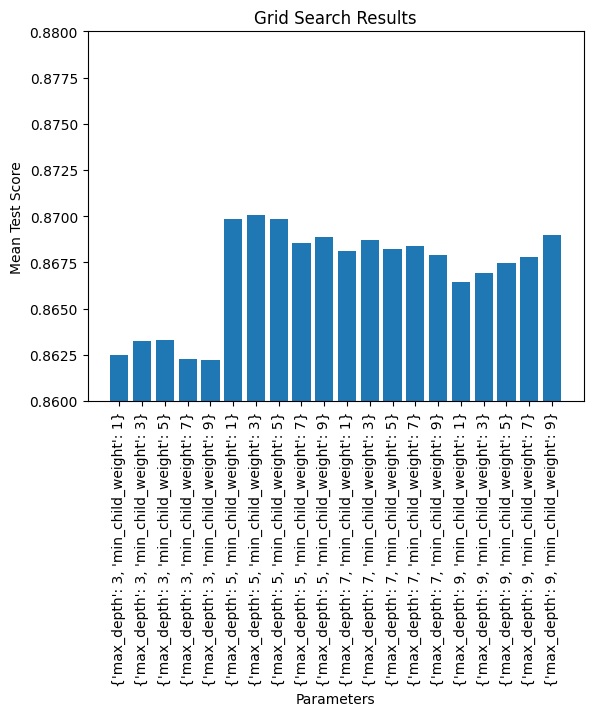

In [9]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.86, 0.88)  # 范围从 0 到 1
plt.show()

In [11]:
# 设置参数范围
param_grid = {'gamma':[i/10.0 for i in range(0,20)]}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=3), param_grid=param_grid, cv=5, scoring='accuracy')

# 执行参数搜索
grid_search.fit(X_train, y_train)

# 打印所有参数组合的训练结果
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

# 输出最优参数和对应的评估结果
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

            params  mean_test_score
0   {'gamma': 0.0}         0.870070
1   {'gamma': 0.1}         0.868480
2   {'gamma': 0.2}         0.869577
3   {'gamma': 0.3}         0.869851
4   {'gamma': 0.4}         0.869796
5   {'gamma': 0.5}         0.869193
6   {'gamma': 0.6}         0.868370
7   {'gamma': 0.7}         0.869522
8   {'gamma': 0.8}         0.870345
9   {'gamma': 0.9}         0.870180
10  {'gamma': 1.0}         0.870619
11  {'gamma': 1.1}         0.868919
12  {'gamma': 1.2}         0.869248
13  {'gamma': 1.3}         0.868864
14  {'gamma': 1.4}         0.868370
15  {'gamma': 1.5}         0.869467
16  {'gamma': 1.6}         0.869357
17  {'gamma': 1.7}         0.868974
18  {'gamma': 1.8}         0.869028
19  {'gamma': 1.9}         0.868809
Best parameters: {'gamma': 1.0}
Best score: 0.8706187924730477


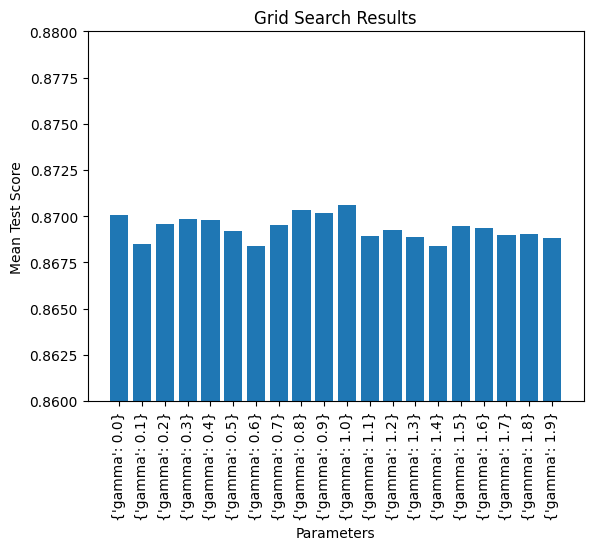

In [13]:
# 提取参数和得分
params = [str(params) for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# 绘制柱状图
plt.bar(params, scores)
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(rotation=90)
plt.ylim(0.86, 0.88)  # 范围从 0 到 1
plt.show()

In [18]:
# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  # 多分类问题
    'num_class': 2,  # 类别数
    'max_depth': 3,  # 树的最大深度
    'eta': 0.3,  # 学习率
    'eval_metric': 'merror',  # 评估指标
    'gamma': 1
}

# 训练模型
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# 计算准确率
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.8710243474446151


In [19]:
# 获取特征重要性
importance = model.get_score(importance_type='weight')

# 按特征重要性排序
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# 打印特征重要性
print("特征重要性:")
for feature, score in sorted_importance:
    print(f"{encoded_feature_names[int(feature)]}: {score}")

特征重要性:
capital.gain: 116.0
age: 112.0
capital.loss: 110.0
fnlwgt: 106.0
education.num: 74.0
hours.per.week: 74.0
relationship_Husband: 34.0
relationship_Wife: 30.0
workclass_Self-emp-not-inc: 20.0
occupation_Prof-specialty: 18.0
sex_Male: 18.0
occupation_Exec-managerial: 16.0
workclass_Self-emp-inc: 14.0
occupation_Farming-fishing: 14.0
occupation_Sales: 14.0
workclass_Local-gov: 12.0
occupation_Other-service: 10.0
occupation_Tech-support: 10.0
workclass_Federal-gov: 8.0
workclass_Private: 8.0
marital.status_Separated: 8.0
occupation_Craft-repair: 8.0
occupation_Handlers-cleaners: 8.0
occupation_Protective-serv: 8.0
occupation_Transport-moving: 8.0
relationship_Not-in-family: 8.0
relationship_Own-child: 8.0
relationship_Unmarried: 8.0
marital.status_Never-married: 6.0
marital.status_Widowed: 6.0
native.country_?: 6.0
native.country_Columbia: 6.0
native.country_Italy: 6.0
native.country_Japan: 6.0
native.country_United-States: 6.0
marital.status_Divorced: 4.0
marital.status_Married-AF-s

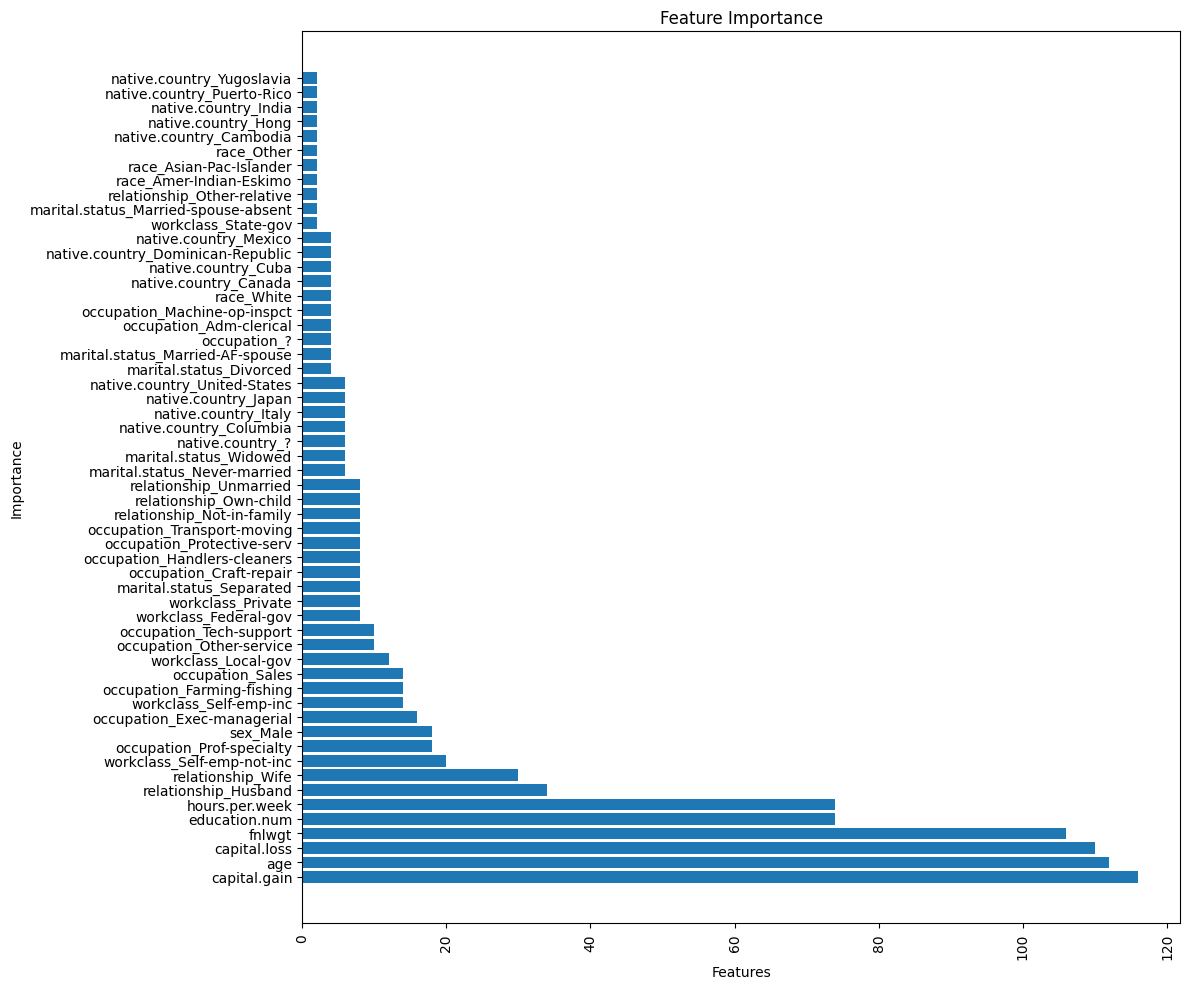

In [23]:
import matplotlib.pyplot as plt

data = {
    'capital.gain': 116.0,
    'age': 112.0,
    'capital.loss': 110.0,
    'fnlwgt': 106.0,
    'education.num': 74.0,
    'hours.per.week': 74.0,
    'relationship_Husband': 34.0,
    'relationship_Wife': 30.0,
    'workclass_Self-emp-not-inc': 20.0,
    'occupation_Prof-specialty': 18.0,
    'sex_Male': 18.0,
    'occupation_Exec-managerial': 16.0,
    'workclass_Self-emp-inc': 14.0,
    'occupation_Farming-fishing': 14.0,
    'occupation_Sales': 14.0,
    'workclass_Local-gov': 12.0,
    'occupation_Other-service': 10.0,
    'occupation_Tech-support': 10.0,
    'workclass_Federal-gov': 8.0,
    'workclass_Private': 8.0,
    'marital.status_Separated': 8.0,
    'occupation_Craft-repair': 8.0,
    'occupation_Handlers-cleaners': 8.0,
    'occupation_Protective-serv': 8.0,
    'occupation_Transport-moving': 8.0,
    'relationship_Not-in-family': 8.0,
    'relationship_Own-child': 8.0,
    'relationship_Unmarried': 8.0,
    'marital.status_Never-married': 6.0,
    'marital.status_Widowed': 6.0,
    'native.country_?': 6.0,
    'native.country_Columbia': 6.0,
    'native.country_Italy': 6.0,
    'native.country_Japan': 6.0,
    'native.country_United-States': 6.0,
    'marital.status_Divorced': 4.0,
    'marital.status_Married-AF-spouse': 4.0,
    'occupation_?': 4.0,
    'occupation_Adm-clerical': 4.0,
    'occupation_Machine-op-inspct': 4.0,
    'race_White': 4.0,
    'native.country_Canada': 4.0,
    'native.country_Cuba': 4.0,
    'native.country_Dominican-Republic': 4.0,
    'native.country_Mexico': 4.0,
    'workclass_State-gov': 2.0,
    'marital.status_Married-spouse-absent': 2.0,
    'relationship_Other-relative': 2.0,
    'race_Amer-Indian-Eskimo': 2.0,
    'race_Asian-Pac-Islander': 2.0,
    'race_Other': 2.0,
    'native.country_Cambodia': 2.0,
    'native.country_Hong': 2.0,
    'native.country_India': 2.0,
    'native.country_Puerto-Rico': 2.0,
    'native.country_Yugoslavia': 2.0
}

# 提取特征和重要性
features = list(data.keys())
importance = list(data.values())

# 创建柱状图
plt.figure(figsize=(12, 10))
# 创建水平柱状图
plt.barh(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
# 显示每个柱形的数值
for i, v in enumerate(importance):
    plt.text(v + 10, i, str(v))
plt.show()


In [25]:
# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 设置参数
params = {
    'objective': 'multi:softmax',  # 多分类问题
    'num_class': 2,  # 类别数
    'max_depth': 3,  # 树的最大深度
    'eta': 0.3,  # 学习率
    'eval_metric': 'merror'  # 评估指标
}

# 训练模型
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred = model.predict(dtest)

# 将预测结果转换为整数类型
y_pred = y_pred.astype(int)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8725597718797982


In [30]:
# 预测
# 读入文件
test_data_df = pd.read_csv("../data/testdata.csv")
test_data_df.at[9360, 'native.country'] = '?'
features = test_data_df.columns

# 数值填充
test_data_df.replace('Preschool', 1, inplace=True)
test_data_df.replace('1st-4th', 2, inplace=True)
test_data_df.replace('5th-6th', 3, inplace=True)
test_data_df.replace('7th-8th', 4, inplace=True)
test_data_df.replace('9th', 5, inplace=True)
test_data_df.replace('10th', 6, inplace=True)
test_data_df.replace('11th', 7, inplace=True)
test_data_df.replace('12th', 8, inplace=True)
test_data_df.replace('HS-grad', 9, inplace=True)
test_data_df.replace('Some-college', 10, inplace=True)
test_data_df.replace('Assoc-voc', 11, inplace=True)
test_data_df.replace('Assoc-acdm', 12, inplace=True)
test_data_df.replace('Bachelors', 13, inplace=True)
test_data_df.replace('Prof-school', 14, inplace=True)
test_data_df.replace('Masters', 15, inplace=True)
test_data_df.replace('Doctorate', 16, inplace=True)

# 对非数值信息独热编码
encoder = OneHotEncoder()
X_pred = encoder.fit_transform(test_data_df[['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country']]).toarray()
X_pred = pd.concat([pd.DataFrame(X_pred), test_data_df[['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]], axis=1)
X_pred

# 数据归一化
X_pred.columns = X_pred.columns.astype(str)

# 使用StandardScaler进行Z-Score归一化
zscore_scaler = StandardScaler()
df_zscore_scaled = zscore_scaler.fit_transform(X_pred)

X_pred = pd.DataFrame(df_zscore_scaled)

# 相关性分析
correlation_matrix = X_pred.corr()

# 获取独热编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(['workclass', 'marital.status','occupation', 'relationship', 'race', 'sex', 'native.country'])
arr = np.array(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
encoded_feature_names = np.append(encoded_feature_names, arr)
for i in range(len(encoded_feature_names)):
    print(i, encoded_feature_names[i])
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i >= j or i == 44: continue
        e = correlation_matrix[i][j]
        if e > 0.6 or e < -0.6: 
            print(i, encoded_feature_names[i], j, encoded_feature_names[j], e)
            if i in X_pred.columns: X_pred = X_pred.drop(i, axis=1)
                
X_pred

0 workclass_?
1 workclass_Federal-gov
2 workclass_Local-gov
3 workclass_Never-worked
4 workclass_Private
5 workclass_Self-emp-inc
6 workclass_Self-emp-not-inc
7 workclass_State-gov
8 workclass_Without-pay
9 marital.status_Divorced
10 marital.status_Married-AF-spouse
11 marital.status_Married-civ-spouse
12 marital.status_Married-spouse-absent
13 marital.status_Never-married
14 marital.status_Separated
15 marital.status_Widowed
16 occupation_?
17 occupation_Adm-clerical
18 occupation_Armed-Forces
19 occupation_Craft-repair
20 occupation_Exec-managerial
21 occupation_Farming-fishing
22 occupation_Handlers-cleaners
23 occupation_Machine-op-inspct
24 occupation_Other-service
25 occupation_Priv-house-serv
26 occupation_Prof-specialty
27 occupation_Protective-serv
28 occupation_Sales
29 occupation_Tech-support
30 occupation_Transport-moving
31 relationship_Husband
32 relationship_Not-in-family
33 relationship_Other-relative
34 relationship_Own-child
35 relationship_Unmarried
36 relationship_W

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,88,89,90,91
0,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,2.365352,-0.304488,-0.036433,0.234750,-0.221203,1.577408
1,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.347320,0.344807,1.927770,-0.148041,-0.221203,1.175093
2,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,-2.933548,-0.045293,-0.020239,-0.200689,1.148321,-0.429274,-0.148041,-0.221203,-0.031851
3,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.493951,0.375968,1.142089,-0.148041,-0.221203,0.370464
4,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,0.213488,-0.036433,-0.148041,-0.221203,-1.962962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.787212,-0.782908,1.142089,-0.148041,-0.221203,-0.434166
9765,-0.172409,-0.256716,-0.01431,0.658054,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.567266,0.338517,-0.429274,-0.148041,-0.221203,-0.031851
9766,5.800159,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-0.200689,-0.052032,1.142089,-0.148041,-0.221203,-0.031851
9767,-0.172409,-0.256716,-0.01431,-1.519632,-0.185213,-0.300078,-0.19813,-0.02479,-0.398717,-0.02479,...,-0.020239,0.340884,-0.045293,-0.020239,-1.373736,-0.249955,-0.429274,-0.148041,-0.221203,-1.641110


In [31]:
X_pred = xgb.DMatrix(X_pred)
y_pred = model.predict(X_pred)
y_pred = y_pred.astype(int)
# 打印预测结果
print("Predicted labels:", y_pred)

Predicted labels: [0 1 0 ... 1 0 0]


In [32]:
# 指定要写入的文件路径和文件名
output_file = "../data/esemble_label.txt"

# 打开文件并写入预测结果
with open(output_file, "w") as file:
    for prediction in y_pred:
        file.write(str(prediction) + "\n")

print("预测结果已写入文件:", output_file)

预测结果已写入文件: ../data/esemble_label.txt
